# About this Competition

You are someone who is recently starting on NLP or has become a master ,irrespective of where you lie in the learning chain , I can bet you have worked on sentiment analysis and if not you will be going to, you just can't bypass it. Can You?. <b>Sentiment analysis</b> is for NLP <b>'what Happy Birthday to You'</b> is for Guitar players Right? You start here <br>
<br>
In case you are not aware about sentiment analysis here is a very good article : https://towardsdatascience.com/sentiment-analysis-concept-analysis-and-applications-6c94d6f58c17
<br><br>
Yesterday Kaggle Lauched a new competition admist the COVID-19 Scare , named Twitter Sentiment Extraction ,I know right its a twitter sentiment analysis competition,But kaggle never disappoints you,it could not have been this straightforward, afterall it has go on for two months.So what this competition asks for is not the sentiment scores but the part of the tweet (word or phrase) that reflects the sentiment., Interesting it isn't it? This competition is special,so if you want to level up your NLP skills , this competition is for you

# Acknowledgements
* https://www.kaggle.com/aashita/word-clouds-of-various-shapes --> WORDCLOUDS FUNCTION

# About this Notebook

In this kernel, I will briefly explain the structure of dataset.I will generate and analyze metafeatures. Then, I will visualize the dataset using Matplotlib, seaborn and Plotly to gain as much insight as I can
<br><br>
In case you are just starting with NLP here is a guide to Approach almost any NLP Problem by Grandmaster @Abhishek Thakur
https://www.slideshare.net/abhishekkrthakur/approaching-almost-any-nlp-problem

<b> This kernel is a work in Progress,and I will keep on updating it as the competition progresses and I learn more and more things about the data</b>

**<span style="color:Red">If you find this kernel useful, Please Upvote it , it motivates me to write more Quality content**

# 1) Importing Necesseties 

In [1]:
import re
import string
import numpy as np # linear algebra
import random
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/tweet-sentiment-extraction/train.csv
/kaggle/input/tweet-sentiment-extraction/test.csv
/kaggle/input/tweet-sentiment-extraction/sample_submission.csv
/kaggle/input/masks-for-wordclouds/twitter_mask.png


**Below is a helper Function which generates random colors which can be used to give different colors to your plots.Feel free to use it**

In [2]:
def random_colours(number_of_colors):
    '''
    Simple function for random colours generation.
    Input:
        number_of_colors - integer value indicating the number of colours which are going to be generated.
    Output:
        Color in the following format: ['#E86DA4'] .
    '''
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors

# 2)Reading the Data

In [3]:
train = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/train.csv')
test = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/test.csv')
ss = pd.read_csv('/kaggle/input/tweet-sentiment-extraction/sample_submission.csv')

In [4]:
print(train.shape)
print(test.shape)

(27486, 4)
(3535, 3)


So We have 27486 tweets in the train set and 3535 tweets in the test set

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27486 entries, 0 to 27485
Data columns (total 4 columns):
textID           27486 non-null object
text             27485 non-null object
selected_text    27485 non-null object
sentiment        27486 non-null object
dtypes: object(4)
memory usage: 859.1+ KB


We have one null Value in the train , as the test field for value is NAN we will just remove it

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3535 entries, 0 to 3534
Data columns (total 3 columns):
textID       3535 non-null object
text         3535 non-null object
sentiment    3535 non-null object
dtypes: object(3)
memory usage: 83.0+ KB


There are no null Values in the test set

# 3) EDA

In [7]:
train.head()

,textID,text,selected_text,sentiment
0,a3d0a7d5ad,Spent the entire morning in a meeting w/ a ven...,my boss was not happy w/ them. Lots of fun.,neutral
1,251b6a6766,Oh! Good idea about putting them on ice cream,Good,positive
2,c9e8d1ef1c,says good (or should i say bad?) afternoon! h...,says good (or should i say bad?) afternoon!,neutral
3,f14f087215,i dont think you can vote anymore! i tried,i dont think you can vote anymore!,negative
4,bf7473b12d,haha better drunken tweeting you mean?,better,positive


In [8]:
train.describe()

,textID,text,selected_text,sentiment
count,27486,27485,27485,27486
unique,27486,27485,22579,3
top,cb115a93d3,"Omedetou!! That's truly exciting, but expecte...",good,neutral
freq,1,1,195,11118


Lets look at the distribution of tweets in the train set

In [9]:
temp = train.groupby('sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

,sentiment,text
1,neutral,11117
2,positive,8582
0,negative,7786


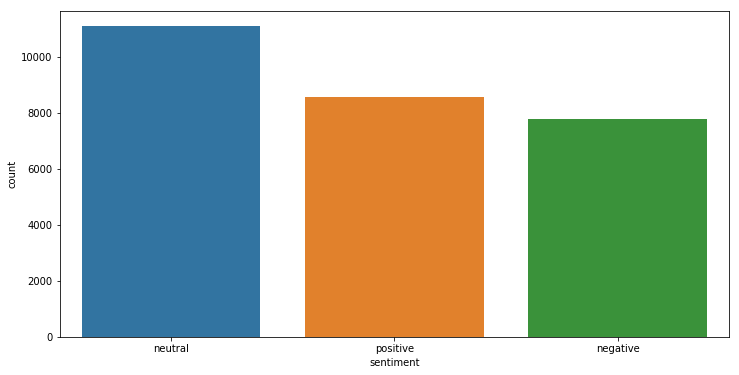

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train)

Let's draw a Funnel-Chart for better visualization

In [11]:
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

## Generating Meta-Features

In [12]:
train['Num_words_ST'] = train['selected_text'].apply(lambda x:len(str(x).split())) #Number Of words in Selected Text
train['Num_word_text'] = train['text'].apply(lambda x:len(str(x).split())) #Number Of words in main text
train['len_of_ST'] = train['selected_text'].apply(lambda x:len(str(x))) #Number of characters in selected text
train['len_of_text'] = train['text'].apply(lambda x:len(str(x))) #Number of characters in main text
train['difference_in_len'] = train['len_of_text'] - train['len_of_ST'] #Difference in length os text and Selected Text

Let's look at the distribution of Meta-Features

In [13]:
hist_data = [train['Num_words_ST'],train['Num_word_text']]

group_labels = ['Selected_Text', 'Text']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,show_curve=False)
fig.update_layout(title_text='Distribution of Number Of words')
fig.update_layout(
    autosize=False,
    width=900,
    height=700,
    paper_bgcolor="LightSteelBlue",
)
fig.show()

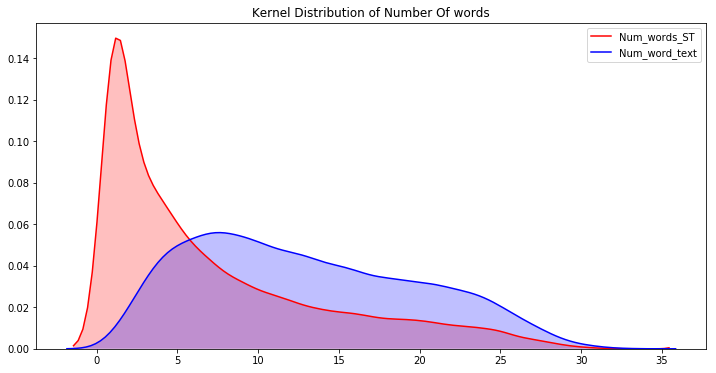

In [14]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train['Num_words_ST'], shade=True, color="r").set_title('Kernel Distribution of Number Of words')
p1=sns.kdeplot(train['Num_word_text'], shade=True, color="b")

In [15]:
hist_data = [train['len_of_ST'],train['len_of_text']]

group_labels = ['Selected_Text', 'Text']

fig = ff.create_distplot(hist_data, group_labels,show_curve=False)
fig.update_layout(title_text='Distribution of Length Of words')
fig.update_layout(
    autosize=False,
    width=900,
    height=700
)
fig.show()

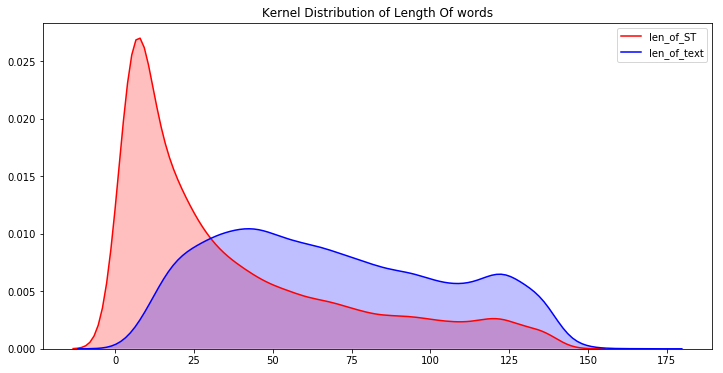

In [16]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(train['len_of_ST'], shade=True, color="r").set_title('Kernel Distribution of Length Of words')
p1=sns.kdeplot(train['len_of_text'], shade=True, color="b")

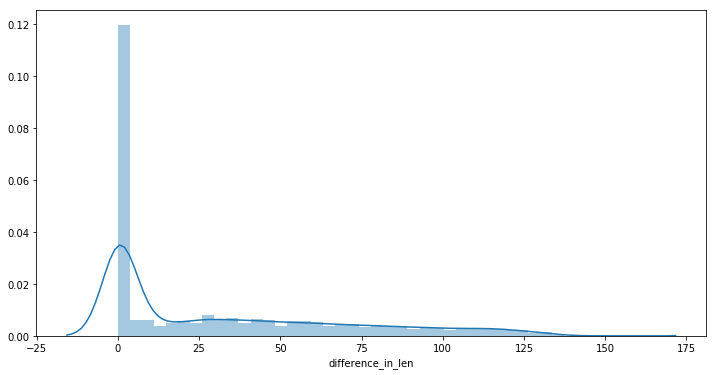

In [17]:
plt.figure(figsize=(12,6))

sns.distplot(train['difference_in_len'])

### Cleaning the Corpus
Now Before We Dive into extracting information out of words in text and selected text,let's first clean the data

In [18]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [19]:
train['text'] = train['text'].apply(lambda x:clean_text(x))
train['selected_text'] = train['text'].apply(lambda x:clean_text(x))

In [20]:
train.head()

,textID,text,selected_text,sentiment,Num_words_ST,Num_word_text,len_of_ST,len_of_text,difference_in_len
0,a3d0a7d5ad,spent the entire morning in a meeting w a vend...,spent the entire morning in a meeting w a vend...,neutral,10,28,43,132,89
1,251b6a6766,oh good idea about putting them on ice cream,oh good idea about putting them on ice cream,positive,1,9,4,46,42
2,c9e8d1ef1c,says good or should i say bad afternoon,says good or should i say bad afternoon,neutral,8,9,43,69,26
3,f14f087215,i dont think you can vote anymore i tried,i dont think you can vote anymore i tried,negative,7,9,34,43,9
4,bf7473b12d,haha better drunken tweeting you mean,haha better drunken tweeting you mean,positive,1,6,6,39,33


## Most Common words in our Target-Selected Text

In [21]:
train['temp_list'] = train['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,i,13140
1,to,10015
2,the,8963
3,a,6708
4,my,5505
5,and,5063
6,you,4781
7,it,4070
8,is,3973
9,in,3782


In [22]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

OOPS!While we cleaned our dataset we didnt remove the stop words and hence we can see the most coomon word is 'to' . Let's try again after removing the stopwords

In [23]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
train['temp_list'] = train['temp_list'].apply(lambda x:remove_stopword(x))

In [24]:
top = Counter([item for sublist in train['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

,Common_words,count
1,day,2039
2,good,1544
3,get,1425
4,like,1344
5,go,1265
6,dont,1198
7,love,1119
8,work,1109
9,going,1096
10,today,1092


In [25]:
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

# Most Common words in Text

Let's also look at the most common words in Text

In [26]:
train['temp_list1'] = train['text'].apply(lambda x:str(x).split()) #List of words in every row for text
train['temp_list1'] = train['temp_list1'].apply(lambda x:remove_stopword(x)) #Removing Stopwords

In [27]:
top = Counter([item for sublist in train['temp_list1'] for item in sublist])
temp = pd.DataFrame(top.most_common(25))
temp = temp.iloc[1:,:]
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
1,day,2039
2,good,1544
3,get,1425
4,like,1344
5,go,1265
6,dont,1198
7,love,1119
8,work,1109
9,going,1096
10,today,1092


So the first two common word was I'm so I removed it and took data from second row

In [28]:
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

SO we can see the Most common words in Selected text and Text are almost the same,which was obvious

# Most common words Sentiments Wise

Let's look at the most common words in different sentiments

In [29]:
Positive_sent = train[train['sentiment']=='positive']
Negative_sent = train[train['sentiment']=='negative']
Neutral_sent = train[train['sentiment']=='neutral']

In [30]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,day,1221
1,good,1042
2,love,873
3,happy,838
4,im,740
5,mothers,627
6,thanks,553
7,great,478
8,like,411
9,hope,396


In [31]:
fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [32]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

,Common_words,count
1,like,476
2,dont,470
3,cant,464
4,get,436
5,miss,423
6,go,401
7,sad,389
8,work,386
9,sorry,339
10,really,339


In [33]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

In [34]:
#MosT common Neutral words
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']
temp_neutral.style.background_gradient(cmap='Reds')

,Common_words,count
1,get,622
2,go,575
3,day,502
4,dont,489
5,going,479
6,work,476
7,like,457
8,got,453
9,lol,453
10,today,433


In [35]:
fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [36]:
fig = px.treemap(temp_neutral, path=['Common_words'], values='count',title='Tree Of Most Common Neutral Words')
fig.show()

* We can see words like get,go,dont,got,u,cant,lol,like are common in all three segments . That's interesting because words like dont and cant are more of negative nature and words like lol are more of positive nature.Does this mean our data is incorrectly labelled , we will have more insights on this after N-gram analysis
* It will be interesting to see the word unique to different sentiments

## Let's Look at Unique Words in each Segment

We will look at unique words in each segment in the Following Order:
* Positive
* Negative
* Neutral

In [37]:
raw_text = [word for word_list in train['temp_list1'] for word in word_list]

In [38]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in train[train.sentiment != sentiment]['temp_list1']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in train[train.sentiment == sentiment]['temp_list1']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

### Positive Tweets

In [39]:
Unique_Positive= words_unique('positive', 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


,words,count
0,congratulations,29
1,thnx,10
2,appreciated,8
3,greetings,7
4,presents,7
5,shared,7
6,blessings,6
7,mothersday,6
8,mcr,6
9,coolest,6


In [40]:
fig = px.treemap(Unique_Positive, path=['words'], values='count',title='Tree Of Unique Positive Words')
fig.show()

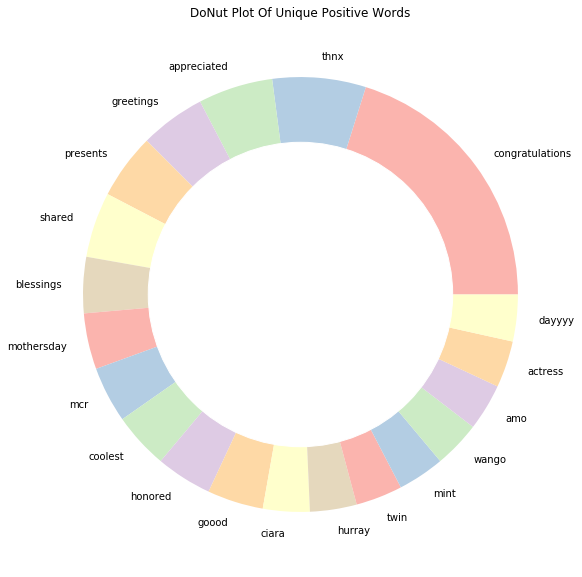

In [41]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()

In [42]:
Unique_Negative= words_unique('negative', 10, raw_text)
print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


,words,count
0,ache,12
1,suffering,9
2,allergic,7
3,cramps,7
4,saddest,7
5,pissing,7
6,devastated,6
7,noes,6
8,sob,6
9,dealing,6


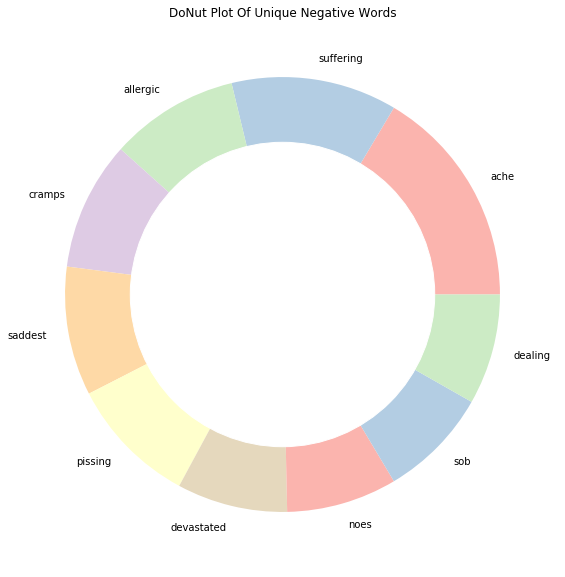

In [43]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.rcParams['text.color'] = 'black'
plt.pie(Unique_Negative['count'], labels=Unique_Negative.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Negative Words')
plt.show()

In [44]:
Unique_Neutral= words_unique('neutral', 10, raw_text)
print("The top 10 unique words in Neutral Tweets are:")
Unique_Neutral.style.background_gradient(cmap='Oranges')

The top 10 unique words in Neutral Tweets are:


,words,count
0,settings,9
1,explain,7
2,hiya,6
3,mite,6
4,lighter,5
5,lecture,5
6,matthew,5
7,reader,5
8,bucks,5
9,sorta,5


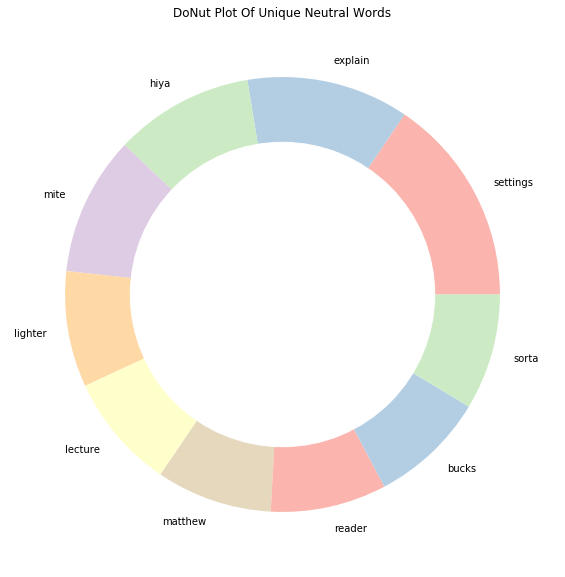

In [45]:
from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Neutral['count'], labels=Unique_Neutral.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Neutral Words')
plt.show()

**By Looking at the Unique Words of each sentiment,we now have much more clarity about the data,these unique words are very strong determiners of Sentiment of tweets**

## It's Time For WordClouds

We will be building wordclouds in the following order:

* WordCloud of Neutral Tweets
* WordCloud of Positive Tweets
* WordCloud of Negative Tweets


In [46]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
d = '/kaggle/input/masks-for-wordclouds/'

I have added more words like im , u (that we say were there in the most common words,disturbing our analysis) as stopwords

#### WORDCLOUD OF NEUTRAL TWEETS

We Have already visualized our Most Common Negative words ,but Wordclouds Provide us much more clarity

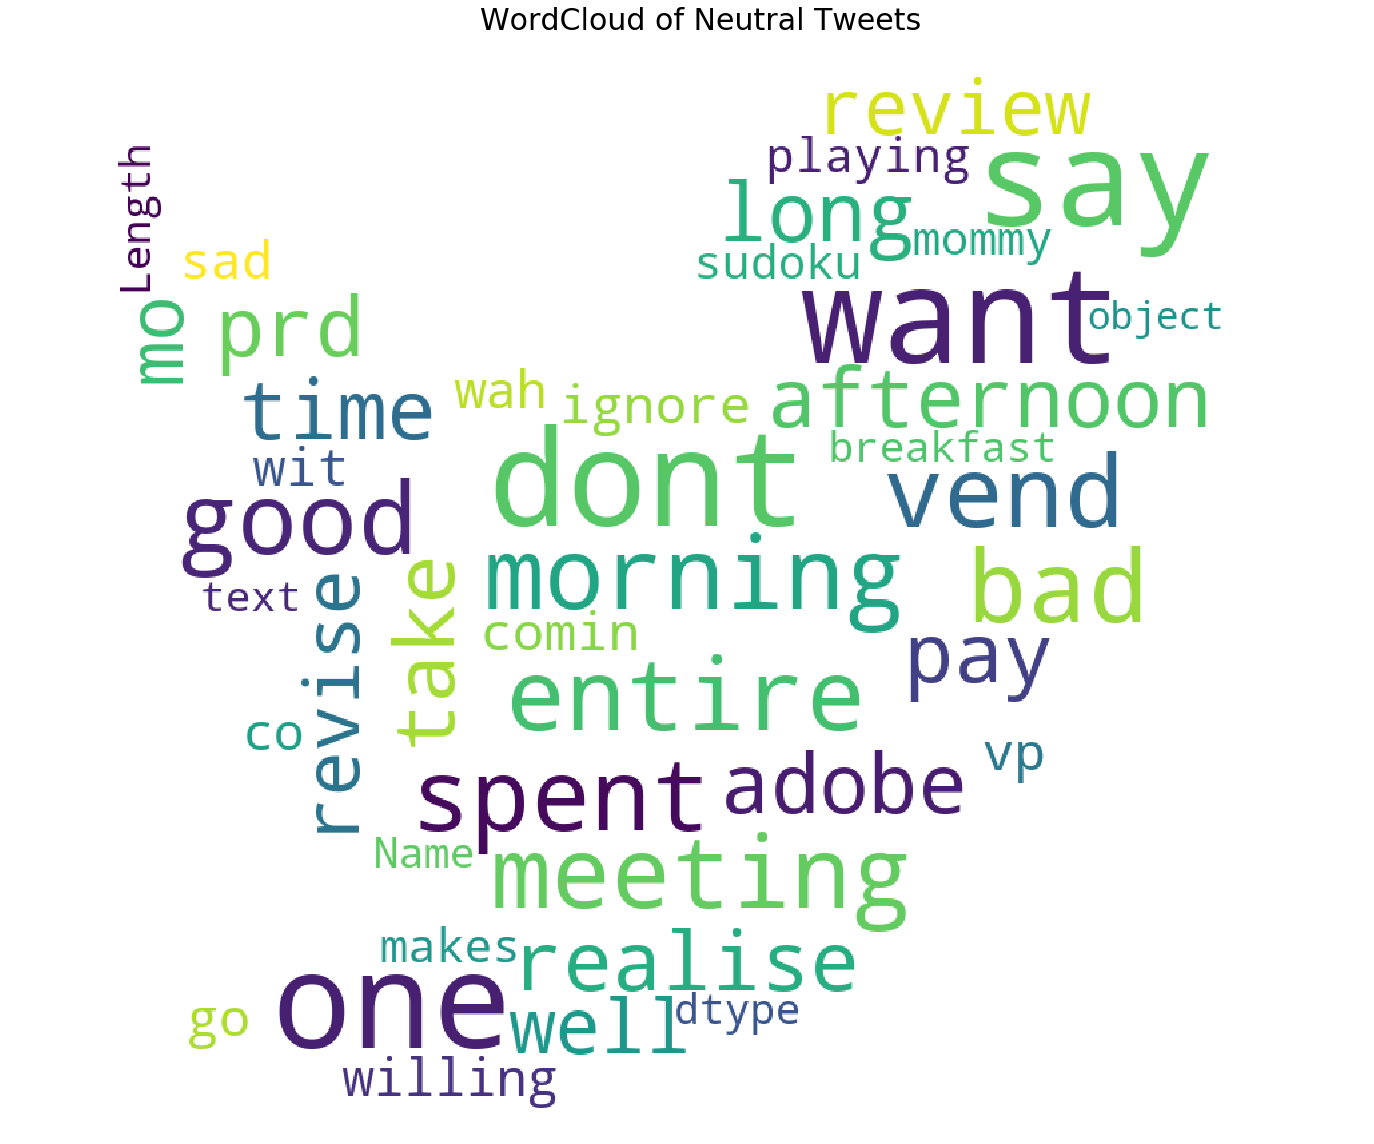

In [47]:
pos_mask = np.array(Image.open(d+ 'twitter_mask.png'))
plot_wordcloud(Neutral_sent.text,mask=pos_mask,color='white',max_font_size=100,title_size=30,title="WordCloud of Neutral Tweets")

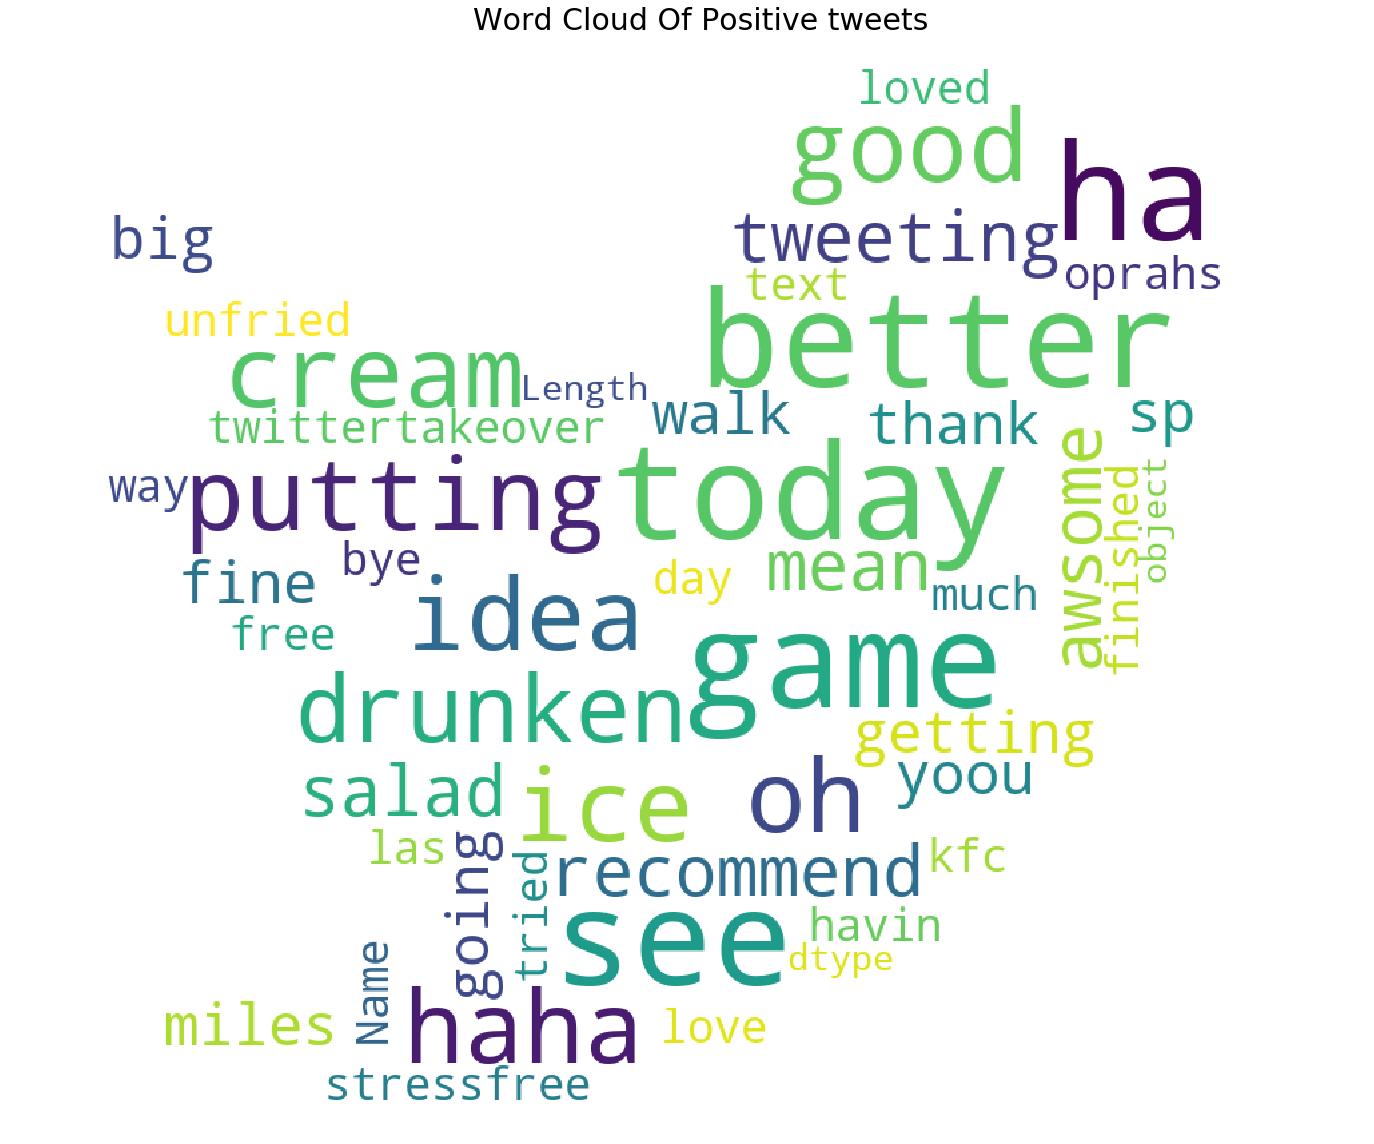

In [48]:
plot_wordcloud(Positive_sent.text,mask=pos_mask,title="Word Cloud Of Positive tweets",title_size=30)

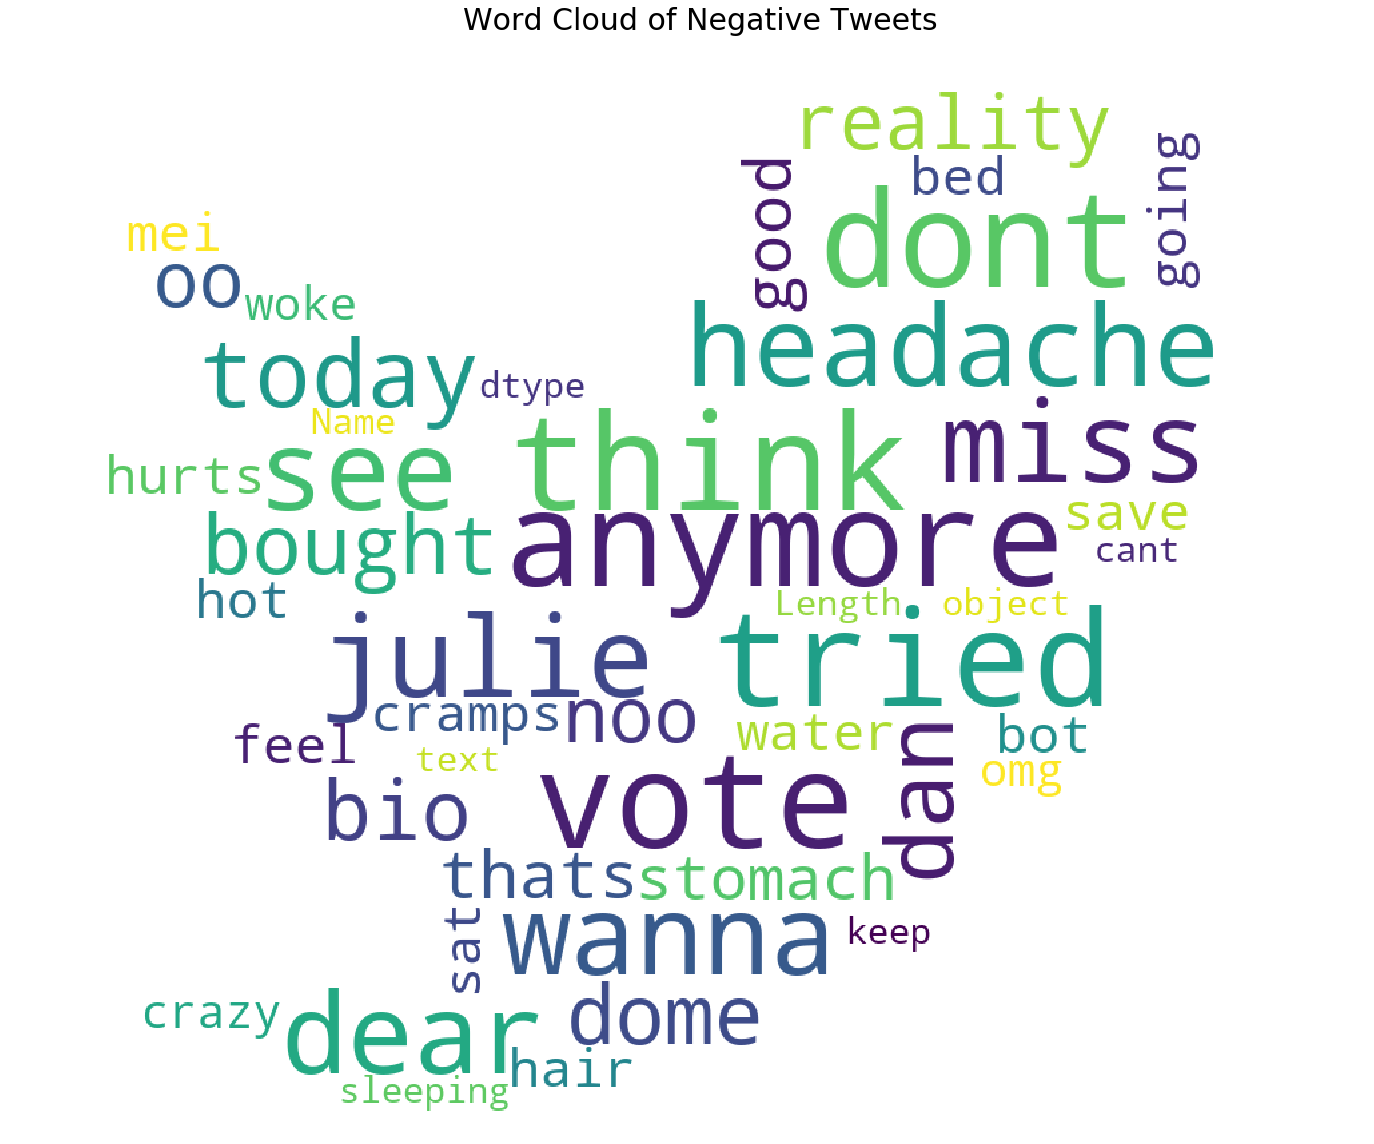

In [49]:
plot_wordcloud(Negative_sent.text,mask=pos_mask,title="Word Cloud of Negative Tweets",color='white',title_size=30)

## A LOT MORE TO COME. NEXT TO COME WILL BE NGRAM ANALYSIS, MORE VISUALS, FIRST MODEL

## <span style="color:Red"> If You like my efforts Please Upvote and let my kernel reach everyone